[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1qjSiSYicvhI6WFQU2ckrF2OROqG_SRsM#scrollTo=rECQncQ9xpKZ)

Dada una imagen, ¿podemos predecir la clase correcta de esta imagen?

Las imágenes son muy pequeñas (32x32) y al visualizarlas notarás lo difícil que es distinguirlas incluso para un humano.

Se va a construir un modelo de CNN que pueda clasificar imágenes de varios objetos. Tenemos 10 clases de imágenes:

* Avión
* Automóvil
* Pájaro
* Gato
* Ciervo
* Perro
* Rana
* Caballo
* Barco
* Camión
---

## **Configuración Inicial**

**Conexion Drive**

In [112]:
# Si necesitas ejecutar el notebook con un archivo desde tu drive personal
# from google.colab import drive
# drive.mount('/gdrive')

# Repositorios
# path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/Repositorio_Portafolio/'
# filename = "AdquisicionCreditoHipotecario.csv"
# fullpath = os.path.join(path, filename)

**Librerias**

In [113]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

# **Lectura de datos**

In [114]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [115]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


# **I. Analisis Exploratorio**

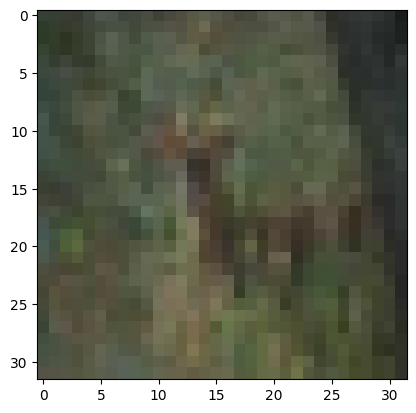

In [116]:
# Vista por indice
index = 10
X_train[index]
img = plt.imshow(X_train[index])

In [117]:
# Clasificacion
print("Etiqueta de la imagen: ", y_train[index])
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("La imagen es: ", labels[y_train[index][0]])

Etiqueta de la imagen:  [4]
La imagen es:  deer


# **II. Preprocesamiento**

**One Hot Encoding**

In [118]:
# Convierte las etiquetas en un conjunto de 10 numeros para ingresar en la red neuronal
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [119]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [120]:
print(y_train[index])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


**Normalizacion**

In [121]:
X_train = X_train / 255
X_test  = X_test / 255

In [122]:
X_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

# **III. Modelo**

In [123]:
# Crear arquitectura
model = Sequential()

# Primera capa (convolucion) (Relu convierte valores negativos a positivos)
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))

# Capa agrupacion
model.add(MaxPooling2D(pool_size=(2,2)))

# Agrega Segunda capa (convolucion)
model.add(Conv2D(32,(5,5),activation='relu'))

# Agrega Segunda capa de agrupacon
model.add(MaxPooling2D(pool_size=(2,2)))

# Agrega capa aplanadora
model.add(Flatten())

# Agrega capa de 1000 neuronas
model.add(Dense(1000,activation='relu'))

# Agrega capa de caida
model.add(Dropout(0,5))

# Agrega capa de 500 neuronas
model.add(Dense(500,activation='relu'))

# Agrega capa de caida
model.add(Dropout(0,5))

# Agrega capa de 250 neuronas
model.add(Dense(250,activation='relu'))

# Agrega capa con 10 neuronas (softmax devuelve un rango de probabilidades de semejanza)
model.add(Dense(10,activation='softmax'))

In [124]:
# Compila el modelo (adam = metodo de descenso de gradiente)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [125]:
# Entrena el modelo
hist = model.fit(X_train,y_train,
                 batch_size=256,
                 epochs=10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 76s 480ms/step - loss: 1.6963 - accuracy: 0.3751 - val_loss: 1.4285 - val_accuracy: 0.4759
Epoch 2/10
157/157 [==============================] - 88s 561ms/step - loss: 1.3120 - accuracy: 0.5247 - val_loss: 1.3113 - val_accuracy: 0.5389
Epoch 3/10
157/157 [==============================] - 80s 511ms/step - loss: 1.1322 - accuracy: 0.5968 - val_loss: 1.2696 - val_accuracy: 0.5573
Epoch 4/10
157/157 [==============================] - 81s 515ms/step - loss: 0.9958 - accuracy: 0.6482 - val_loss: 1.0992 - val_accuracy: 0.6180
Epoch 5/10
157/157 [==============================] - 80s 507ms/step - loss: 0.8931 - accuracy: 0.6871 - val_loss: 1.0120 - val_accuracy: 0.6447
Epoch 6/10
157/157 [==============================] - 79s 505ms/step - loss: 0.7808 - accuracy: 0.7255 - val_loss: 0.9625 - val_accuracy: 0.6735
Epoch 7/10
157/157 [==============================] - 81s 515ms/step - loss: 0.6703 - accuracy: 0.7640 - val_loss: 0.9620 - val_ac

In [141]:
# Evaluacion
model.evaluate(X_test,y_test)[1]

313/313 [==============================] - 6s 20ms/step - loss: 1.1794 - accuracy: 0.6682


0.6682000160217285

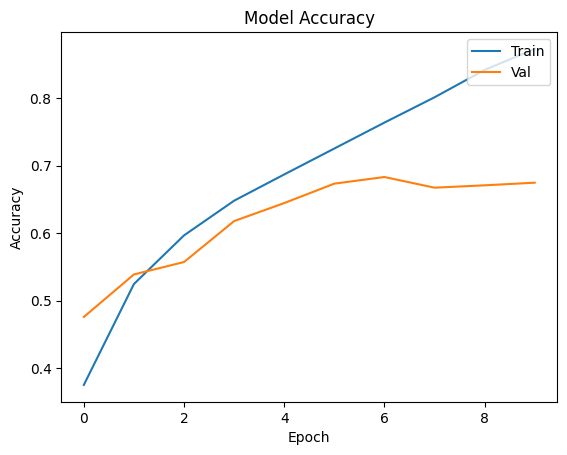

In [126]:
# Precision
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

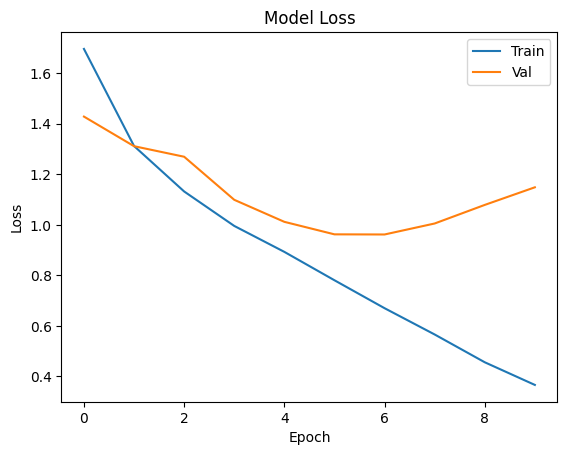

In [127]:
# Modelo de perdida
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

# **IV. Backtesting**

In [142]:
from google.colab import files
uploaded = files.upload()

Saving gato2.jpg to gato2.jpg


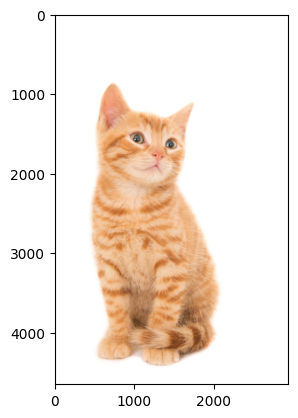

In [143]:
# Mostrar la imagen
new_image = plt.imread('gato2.jpg')
img = plt.imshow(new_image)

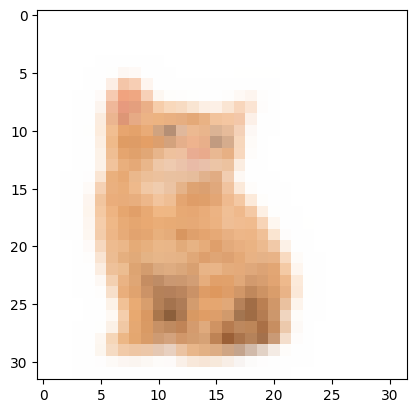

In [144]:
# Cambiar el tamaño de la imagen
from skimage.transform import resize
resized_image = resize(new_image,(32,32,3))
img = plt.imshow(resized_image)

In [145]:
# Predecir
predictions = model.predict(np.array([resized_image]))

# Mostrar predicciones
predictions

1/1 [==============================] - 0s 34ms/step


array([[6.8437681e-03, 1.3146169e-05, 1.7585857e-02, 8.1078029e-01,
        4.0123938e-04, 2.5698829e-02, 8.6738002e-03, 1.3460462e-03,
        1.2777776e-01, 8.7912974e-04]], dtype=float32)

In [146]:
from os import TMP_MAX
# Ordenar las predicciones (menor a mayor)
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
# Mostrar etiquetas ordenadas
print(list_index)

[3, 8, 5, 2, 6, 0, 7, 9, 4, 1]


In [147]:
# Imprime Predicciones
for i in range(5):
  print(labels[list_index[i]],':',round(predictions[0][list_index[i]]*100,2),'%')

cat : 81.08 %
ship : 12.78 %
dog : 2.57 %
bird : 1.76 %
frog : 0.87 %
